In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
# Your Solution Goes Here
Assuage_df = pd.read_csv('../data/assuage_binary_corro_data.csv', header=0)


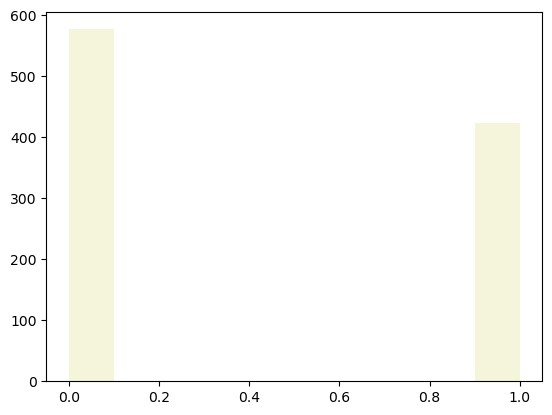

In [5]:
plt.hist(Assuage_df['Distress Level'].values, color="beige")
plt.show()

In [40]:
Assuage_df.describe()

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.536000,82.377000,111.238500,66.642100,26.559570,10.401441,147.67800,4.22700,4530.354000,227.445700,272.277000,65.452000,32.58700,54.541000,14.171700,5.665000,5.478000,0.423000
std,2.290404,12.970316,7.303233,5.352901,4.907742,6.558680,88.41392,2.34904,2310.105804,119.273344,94.253541,37.850024,7.64427,19.890298,1.974215,2.867926,2.849849,0.494283
min,1.000000,55.000000,92.500000,53.500000,18.010000,-2.416000,0.00000,-1.50000,511.000000,-14.600000,61.000000,1.000000,20.00000,10.000000,9.700000,1.000000,1.000000,0.000000
25%,3.000000,73.000000,106.000000,62.600000,22.317500,4.623500,69.00000,2.50000,2569.500000,127.025000,194.000000,32.000000,26.00000,40.000000,12.800000,3.000000,3.000000,0.000000
50%,5.000000,82.000000,111.500000,66.500000,26.645000,10.290000,150.00000,4.00000,4534.000000,227.300000,271.000000,64.000000,33.00000,55.000000,14.150000,6.000000,5.000000,0.000000
75%,6.000000,92.000000,116.500000,70.600000,30.790000,15.724250,226.50000,6.00000,6484.750000,328.375000,350.000000,99.000000,39.00000,69.000000,15.500000,8.000000,8.000000,1.000000
max,8.000000,110.000000,130.000000,80.300000,34.990000,23.281000,300.00000,10.00000,8494.000000,463.600000,479.000000,130.000000,45.00000,100.000000,19.000000,10.000000,10.000000,1.000000


<Axes: >

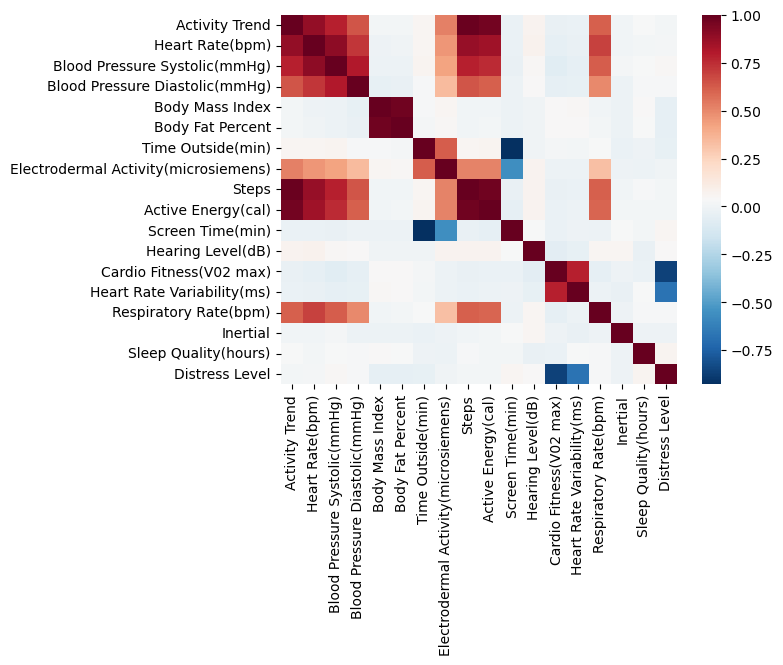

In [41]:
Assuage_df.corr(numeric_only=True)
sb.heatmap(Assuage_df.corr(numeric_only=True), cmap="RdBu_r")

In [6]:
Assuage_df.describe()

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.536000,82.377000,111.238500,66.642100,26.559570,10.401441,147.67800,4.22700,4530.354000,227.445700,272.277000,65.452000,32.58700,54.541000,14.171700,5.665000,5.478000,0.423000
std,2.290404,12.970316,7.303233,5.352901,4.907742,6.558680,88.41392,2.34904,2310.105804,119.273344,94.253541,37.850024,7.64427,19.890298,1.974215,2.867926,2.849849,0.494283
min,1.000000,55.000000,92.500000,53.500000,18.010000,-2.416000,0.00000,-1.50000,511.000000,-14.600000,61.000000,1.000000,20.00000,10.000000,9.700000,1.000000,1.000000,0.000000
25%,3.000000,73.000000,106.000000,62.600000,22.317500,4.623500,69.00000,2.50000,2569.500000,127.025000,194.000000,32.000000,26.00000,40.000000,12.800000,3.000000,3.000000,0.000000
50%,5.000000,82.000000,111.500000,66.500000,26.645000,10.290000,150.00000,4.00000,4534.000000,227.300000,271.000000,64.000000,33.00000,55.000000,14.150000,6.000000,5.000000,0.000000
75%,6.000000,92.000000,116.500000,70.600000,30.790000,15.724250,226.50000,6.00000,6484.750000,328.375000,350.000000,99.000000,39.00000,69.000000,15.500000,8.000000,8.000000,1.000000
max,8.000000,110.000000,130.000000,80.300000,34.990000,23.281000,300.00000,10.00000,8494.000000,463.600000,479.000000,130.000000,45.00000,100.000000,19.000000,10.000000,10.000000,1.000000


In [8]:
Assuage_df[Assuage_df["Active Energy(cal)"] <= 0] 

,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
21,2024-03-01 16:50:58,1,74,112.0,64.2,29.55,14.365,41,-1.5,523,-1.85,434,104,21,46,12.4,4,7,1
25,2024-03-01 03:25:10,1,55,96.5,62.9,23.21,8.123,170,3.5,659,-0.05,301,127,22,52,10.5,3,8,1
39,2024-03-01 05:47:29,1,61,101.5,60.9,28.80,11.390,0,-0.5,627,-6.65,443,60,23,32,10.1,4,10,1
42,2024-03-01 12:34:32,1,58,96.0,61.6,28.87,15.481,99,1.5,770,-7.50,281,10,25,36,10.8,3,10,1
55,2024-03-01 10:28:54,1,56,93.0,59.8,33.96,19.098,93,1.5,548,-4.60,335,80,35,46,13.6,6,4,0
157,2024-03-01 16:50:31,1,71,103.5,63.1,32.37,18.031,21,1.5,668,-14.60,424,77,38,67,12.1,7,3,0
184,2024-03-01 06:14:56,1,58,100.0,55.0,33.28,20.214,173,0.5,678,-3.10,197,61,24,29,11.8,10,9,1
783,2024-03-01 19:45:05,1,64,99.0,57.4,26.08,8.854,233,4.5,756,-8.20,205,52,38,85,11.4,9,9,0
992,2024-03-01 08:04:06,1,73,110.5,68.3,30.44,13.522,15,1.5,592,-4.40,352,78,29,40,15.3,6,7,1


In [42]:
target_column = "Distress Level"
feature_columns = ["Activity Trend","Heart Rate(bpm)","Blood Pressure Systolic(mmHg)","Blood Pressure Diastolic(mmHg)",
                   "Body Mass Index","Body Fat Percent","Time Outside(min)","Electrodermal Activity(microsiemens)","Steps","Active Energy(cal)",
                   "Screen Time(min)","Hearing Level(dB)","Cardio Fitness(V02 max)","Heart Rate Variability(ms)","Respiratory Rate(bpm)","Inertial",
                   "Sleep Quality(hours)"]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Assuage_df[feature_columns],
    Assuage_df[target_column],
    test_size=0.2,
    random_state=180,
    shuffle=True)

In [44]:
y_test.groupby(y_test).count()

Distress Level
0    114
1     86
Name: Distress Level, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    Assuage_df[feature_columns],
    Assuage_df[target_column],
    test_size=0.2,
    random_state=180,
    shuffle=True, 
    stratify=Assuage_df[target_column])   # equalizes

y_train.groupby(y_train).count()

Distress Level
0    462
1    338
Name: Distress Level, dtype: int64

In [46]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape
y_train.describe()

count    800.000000
mean       0.422500
std        0.494266
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Distress Level, dtype: float64

Model Time

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=2020)
model.fit(X_train, y_train)



/opt/anaconda3/envs/AIML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2020)

In [82]:
import sklearn
import coremltools

print(f"scikit-learn version: {sklearn.__version__}")
print(f"coremltools version: {coremltools.__version__}")

scikit-learn version: 1.4.2
coremltools version: 7.2


In [94]:
import coremltools as ct


coreml_model = ct.converters.sklearn.convert(
    model, 
    feature_columns,
    target_column
)

coreml_model.save('Assuage_logistic.mlmodel')

NameError: name '_tree' is not defined

In [91]:
# import coremltools as ct # type: ignore -  Still having issues with coreML transfer

# coreml_model = ct.converters.sklearn.convert(model,feature_columns,target_column)
# coreml_model.save('Assuage_logistic.mlmodel')

NameError: name '_tree' is not defined

In [ ]:
predictions = model.predict(X_test)
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', round(accuracy_score(predictions, y_test), 3))
print('Precision: ', round(precision_score(predictions, y_test), 3))
print('Recall: ', round(recall_score(predictions, y_test), 3))
print('F1: ', round(f1_score(predictions, y_test), 3))

Accuracy:  0.905
Precision:  0.941
Recall:  0.851
F1:  0.894


In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

print(f'True Positive: {tp}\nTrue Negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}')

True Positive: 80
True Negative: 101
False Positive: 14
False Negative: 5


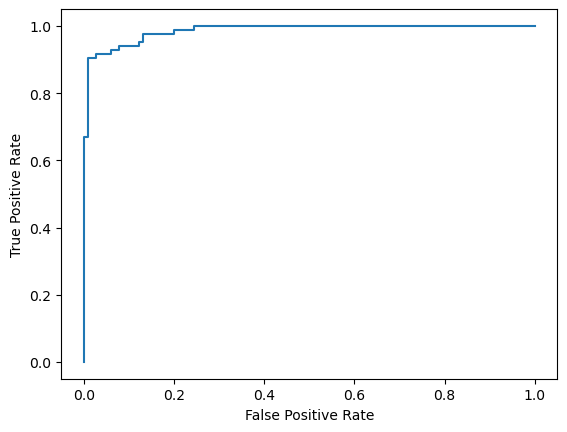

In [ ]:
from sklearn.metrics import roc_curve  #z reciever operator curve
from sklearn.metrics import roc_auc_score

scores = model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, scores, pos_label=True)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr)
plt.show()

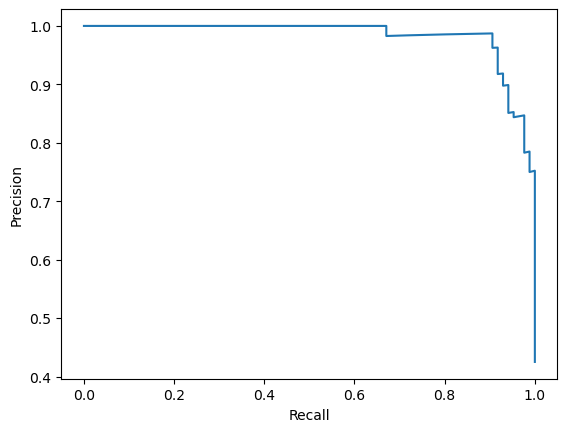

In [ ]:
from sklearn.metrics import precision_recall_curve

scores = model.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, scores)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recall, precision)
plt.show()

Using Grid searchCV

In [ ]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV


# GridsearchCV is to tune hyperparameters 
X_train, X_validate, y_train, y_validate = train_test_split(
    Assuage_df[feature_columns],
    Assuage_df[target_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=Assuage_df[target_column])

model = LogisticRegression(
    random_state=2020,
)
param_grid = {  
    "tol": [1e-3, 1e-4, 1e-5],
    "C": [0.01, 0.1, 1, 10, 50, 100],
    "solver": ["lbfgs", "saga", "liblinear"],
    "max_iter": [100, 200, 150, 300, 400]
    }

search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

search.fit(X_train, y_train)

print(search.best_estimator_)

/opt/anaconda3/envs/AIML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/AIML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

LogisticRegression(C=50, random_state=2020, solver='liblinear', tol=1e-05)


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    Assuage_df[feature_columns],
    Assuage_df[target_column],
    test_size=0.2,
    random_state=180,
    shuffle=True)

y_train.groupby(y_train).count()

X_train, X_validate, y_train, y_validate = train_test_split(
    Assuage_df[feature_columns],
    Assuage_df[target_column],
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=Assuage_df[target_column]
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=2020))
])


param_grid = {
    "log_reg__tol": [1e-3, 1e-4, 1e-5],
    "log_reg__C": [0.01, 0.1, 1, 10, 50, 100],
    "log_reg__solver": ["lbfgs", "saga", "liblinear"],
    "log_reg__max_iter": [100, 200, 150, 300, 400]
}


# search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
search.fit(X_train, y_train)


print("Best Estimator found by GridSearchCV: ", search.best_estimator_)


best_model = search.best_estimator_
best_model.fit(X_train, y_train)
predictions = best_model.predict(X_validate)


print('Accuracy: ', round(accuracy_score(y_validate, predictions), 3))
print('Precision: ', round(precision_score(y_validate, predictions), 3))
print('Recall: ', round(recall_score(y_validate, predictions), 3))
print('F1: ', round(f1_score(y_validate, predictions), 3))


print("Validation Labels: ", y_validate.values[:10])
print("Predictions: ", predictions[:10])

/opt/anaconda3/envs/AIML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/AIML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Best Estimator found by GridSearchCV:  LogisticRegression(C=50, random_state=2020, solver='liblinear', tol=1e-05)
Accuracy:  0.995
Precision:  0.988
Recall:  1.0
F1:  0.994
Validation Labels:  [1 0 0 1 1 0 1 0 0 0]
Predictions:  [1 0 0 1 1 0 1 0 0 0]


In [ ]:
'''Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),
Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),
Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,
Sleep Quality(hours),Distress Level


'''

# 0 might mean distress
single_instance = np.array([[1,59,98.5,64.1,34.46,22.748,92,2.5,935,67.75,282,130,33,69,9.9,9,4]])  # 0




single_instance = np.array([[8,92,111,70.6,25.4,9.97,6,2,8244,394.2,426,74,29,65,15.2,3,10]])  # 1

# Predicting the outcome for the single instance
single_prediction = best_model.predict(single_instance)
print("Prediction for the single instance: ", single_prediction)

Prediction for the single instance:  [1]


/opt/anaconda3/envs/AIML/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
